# Capstone Presentation
You're ready to put into practice everything you've learned so far.

First: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

Second: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

So, here is the deliverable: Prepare a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

* A specified research question your model addresses
* How you chose your model specification and what alternatives you compared it to
* The practical uses of your model for an audience of interest
* Any weak points or shortcomings of your model

This presentation is not a drill. You'll be presenting this slide deck live to a group as the culmination of your work in the last two supervised learning units. As a secondary matter, your slides and / or the Jupyter notebook you use or adapt them into should be worthy of inclusion as examples of your work product when applying to jobs.

Good luck!

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble
from IPython.display import Image
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

%matplotlib inline

# Data Set Information:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to  this date. The "target" field refers to the presence of heart disease in the patient. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). 

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. 

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory. 

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

### Source:

##### Creators: 

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. 

Donor: 

David W. Aha (aha '@' ics.uci.edu) (714) 856-8779



[data](https://www.kaggle.com/ronitf/heart-disease-uci)


[data_full](https://archive.ics.uci.edu/ml/datasets/heart%2BDisease)

In [97]:
heart = pd.read_csv('heart_disease.csv')
heart.columns = ['age','sex','chest_pain','resting_bp',
                 'serum_chol','fasting_bs','resting_ecg',
                 'max_hr','ex_ang','st_depress',
                 'slope_st_depress','num_mv', 'thalassemia','target']
print(heart.head())
print(heart.info())

   age  sex  chest_pain  resting_bp  serum_chol  fasting_bs  resting_ecg  \
0   63    1           3         145         233           1            0   
1   37    1           2         130         250           0            1   
2   41    0           1         130         204           0            0   
3   56    1           1         120         236           0            1   
4   57    0           0         120         354           0            1   

   max_hr  ex_ang  st_depress  slope_st_depress  num_mv  thalassemia  target  
0     150       0         2.3                 0       0            1       1  
1     187       0         3.5                 0       0            2       1  
2     172       0         1.4                 2       0            2       1  
3     178       0         0.8                 2       0            2       1  
4     163       1         0.6                 2       0            2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 3

# Feature Information: 
1. age = age 
2. sex = sex 
3. chest_pain = chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain,4 = asymptomatic ) 
4. resting_bp = resting blood pressure 
5. serum_chol = serum cholestoral in mg/dl 
6. fasting_bp = fasting blood sugar > 120 mg/dl
7. resting_ecg = resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria )
8. max_hr = maximum heart rate achieved 
9. ex_ang = exercise induced angina (binary, 1 = yes) 
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment 
12. number of major vessels (values 0-3) colored by flourosopy 
13. thal = thalassemia (3 = normal, 6 = fixed defect, 7 = reversable defect)
14. target = presence of heart disease (binary, 1 = yes)


* Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back. Angina pain may even feel like indigestion.

* ST depression refers to a finding on an electrocardiogram wherein the trace in the ST segment is abnormally low below the baseline.

* Thalassemia is an inherited blood disorder characterized by less hemoglobin and fewer red blood cells in your body than normal. Hemoglobin is the substance in your red blood cells that allows them to carry oxygen. The low hemoglobin and fewer red blood cells of thalassemia may cause anemia, leaving you fatigued. If you have mild thalassemia, you may not need treatment. But if you have a more severe form of the disorder, you may need regular blood transfusions. You can also take steps on your own to cope with fatigue, such as choosing a healthy diet and exercising regularly.


The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

### Acknowledgements
Creators: 
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.

C:\Users\nicholas.delucchi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\nicholas.delucchi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


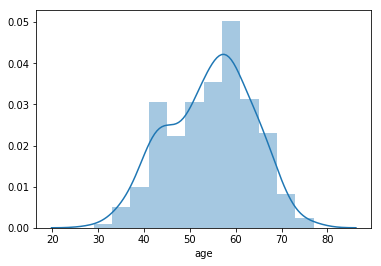

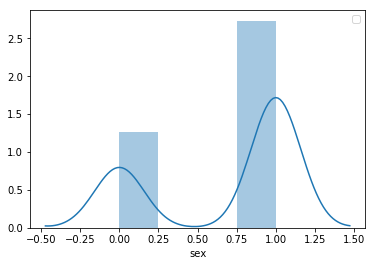

In [98]:
plt.figure()
sns.distplot(heart.age)

plt.figure()
sns.distplot(heart.sex, bins=4,)
plt.legend()

plt.show()

,age,sex,chest_pain,resting_bp,serum_chol,fasting_bs,resting_ecg,max_hr,ex_ang,st_depress,slope_st_depress,num_mv,thalassemia
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
resting_bp,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
serum_chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fasting_bs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
resting_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
max_hr,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
ex_ang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
st_depress,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244


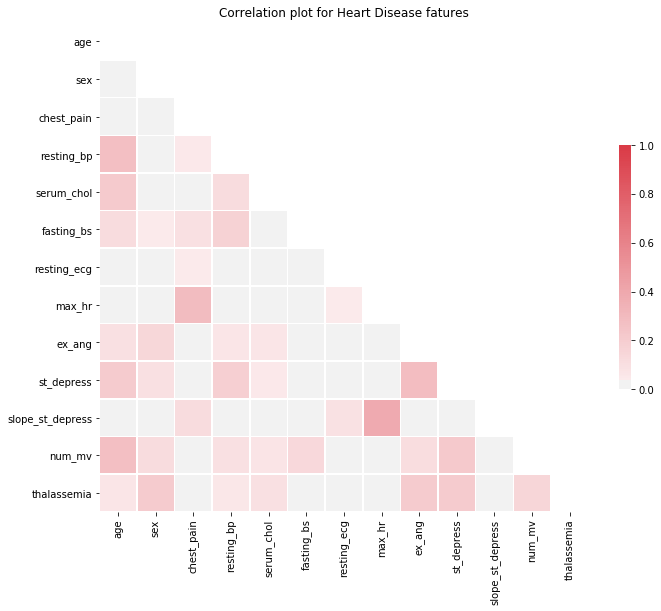

In [99]:
X = heart.drop('target',axis=1)
corr = X.corr()
display(corr)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0, vmax=1, mask=mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation plot for Heart Disease fatures")
plt.show()

In [100]:
X = heart.drop('target',axis=1)
y = heart['target']

In [101]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X,y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nAccuracy: \n', regr.score(X,y))

# initiate train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

# Fit our model to our data.
regr.fit(X_train,y_train)

# Display the attributes we calculated.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nTrain Accuracy: \n', regr.score(X_train,y_train))
print('\nTest Accuracy: \n', regr.score(X_test,y_test))

Coefficients: 
 [-0.00082042 -0.19599555  0.11270339 -0.00199097 -0.00035354  0.01737364
  0.04984795  0.00301933 -0.14404593 -0.05878869  0.07897881 -0.10060216
 -0.11903917]

Intercept: 
 0.8288986814219905

Accuracy: 
 0.5175499644256842

Coefficients: 
 [ 0.00034583 -0.15706757  0.10240127 -0.00237308 -0.00021274  0.02959959
  0.05804984  0.00346351 -0.16448991 -0.05770097  0.06508528 -0.10660998
 -0.13643601]

Intercept: 
 0.7634768485466503

Train Accuracy: 
 0.5257593489278688

Test Accuracy: 
 0.41634510141622816


In [102]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# initiate train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

lasso.fit(X_train, y_train)
#y_pred = lasso.predict(x_2014)

# Display the attributes we calculated.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nTrain Accuracy: \n', regr.score(X_train,y_train))
print('\nTest Accuracy: \n', regr.score(X_test,y_test))

# run cross-validation test
score = cross_val_score(lasso, X_test, y_test, cv=5)
print('\nCross Validation:\n   %0.2f +/- %0.2f' %(score.mean(),score.std()))


Coefficients: 
 [ 0.00034583 -0.15706757  0.10240127 -0.00237308 -0.00021274  0.02959959
  0.05804984  0.00346351 -0.16448991 -0.05770097  0.06508528 -0.10660998
 -0.13643601]

Intercept: 
 0.7634768485466503

Train Accuracy: 
 0.5257593489278688

Test Accuracy: 
 0.41634510141622816

Cross Validation:
   -0.06 +/- 0.24


In [103]:
start_time = time.time()

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=8,
    random_state = 1337
)

decision_tree.fit(X, y)

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
trained = decision_tree.fit(X_train, y_train)
print('Training Accuracy:\n   ',trained.score(X_train, y_train))
print('Testing Accuracy:\n   ',trained.score(X_test, y_test))
y_train_pred = decision_tree.predict(X_train)
print('Prediction Accuracy:\n   ',r2_score(y_train,y_train_pred))
score = cross_val_score(decision_tree, X, y, cv=10)
print('Cross Validation:\n   %0.2f +/- %0.2f' %(score.mean(),score.std()))

print("--- %s seconds ---" % (time.time() - start_time))


Training Accuracy:
    0.9256198347107438
Testing Accuracy:
    0.639344262295082
Prediction Accuracy:
    0.6990049751243781
Cross Validation:
   0.70 +/- 0.08
--- 0.04900002479553223 seconds ---


In [104]:
start_time = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=1000, 
                                      max_depth=3, 
                                      max_features=1)

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1)
trained = rfc.fit(X_train, y_train)
print('Training Accuracy:\n   ', trained.score(X_train, y_train))
print('Testing Accuracy:\n   ', trained.score(X_test, y_test))
y_train_pred = trained.predict(X_train)
print('Prediction Accuracy:\n   ',r2_score(y_train,y_train_pred))
score = cross_val_score(decision_tree, X, y, cv=5)
print('Cross Validation:\n   %0.2f +/- %0.2f' %(score.mean(),score.std()))

t= round((time.time() - start_time),4)
print("--- %s seconds ---" % t)

Training Accuracy:
    0.875
Testing Accuracy:
    0.9032258064516129
Prediction Accuracy:
    0.4946448087431694
Cross Validation:
   0.64 +/- 0.05
--- 2.383 seconds ---


In [105]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y)

knn_w = neighbors.KNeighborsRegressor(n_neighbors=8, 
                                      weights='distance')
knn_w.fit(X, y)

score = cross_val_score(knn, X, y, cv=3)
print("Unweighted Cross Validation:\n   %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X, y, cv=3)
print("Weighted Cross Validation: \n   %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
trained = knn_w.fit(X_train, y_train)
print('\nTraining Accuracy:\n   ', knn_w.score(X_train, y_train))
print('Testing Accuracy:\n   ', knn_w.score(X_test, y_test))
y_train_pred = knn_w.predict(X_train)
print('Prediction Accuracy:\n   ',r2_score(y_train,y_train_pred))

Unweighted Cross Validation:
   -0.06 (+/- 0.16)
Weighted Cross Validation: 
   -0.04 (+/- 0.11)

Training Accuracy:
    1.0
Testing Accuracy:
    -0.04999539567681399
Prediction Accuracy:
    1.0


In [106]:
from sklearn import ensemble

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=1)

start_time = time.time()

# We'll make 5000 iterations, use  4-deep trees, set our loss function, and 4 max leaf-nodes.
params = {'n_estimators': 5000,
          'max_depth': 2,
          'subsample' : 1,
          'loss': 'deviance', #deviance,exponential
          'max_leaf_nodes': 4}

# Initialize and fit the model.
gbc = ensemble.GradientBoostingClassifier(**params)
gbc.fit(X_train, y_train)

print("--- %s seconds for model fit ---" % (time.time() - start_time))

predict_train = gbc.predict(X_train)
predict_test = gbc.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    '\nTraining set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

print('\nTraining Accuracy:\n   ', gbc.score(X_train, y_train))
print('Testing Accuracy:\n   ', gbc.score(X_test, y_test))
y_train_pred = clf.predict(X_train)
print('Prediction Accuracy:\n   ',r2_score(y_train,y_train_pred))

start_time = time.time()
cvs = cross_val_score(gbc,X, y, cv=10)
print('\nCross Validation Score:\n    {} +/- {}'.format(round(cvs.mean(),6), round(cvs.std(),6)))
print("--- %s seconds for cross-val score ---" % (time.time() - start_time))

--- 2.8127999305725098 seconds for model fit ---

Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.0967741935483871
Percent Type II errors: 0.03225806451612903

Training Accuracy:
    1.0
Testing Accuracy:
    0.8709677419354839
Prediction Accuracy:
    1.0

Cross Validation Score:
    0.800979 +/- 0.062081
--- 27.809000253677368 seconds for cross-val score ---


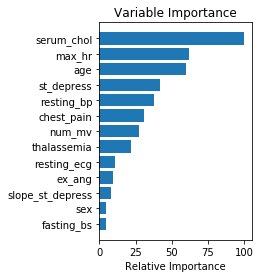

In [107]:
feature_importance = gbc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()